Calculating structural properties
=================================

Quite often you want to calculate some geometric, structural properties of a structure or set of structures, for example the mean bond angles between certain species, or the polyhedral strain. This tutorial goes through various ways to easily extract such quantities from `.magres` files.

As usual, we start by importing the `MagresAtoms` Python class and reading in a `.magres` and naming it `atoms`.

In [1]:
from __future__ import print_function
import warnings
warnings.filterwarnings("ignore") 
%pylab inline

from magres.atoms import MagresAtoms

Populating the interactive namespace from numpy and matplotlib


In [2]:
atoms = MagresAtoms.load_magres('../samples/T1Si0.magres')

Bond lengths
------------

We can calculate the distance between two atoms, for example between the Al1 atom and its neighbour, the O1 atom.

In [3]:
atoms.dist(atoms.Al1, atoms.O1)

1.7623362335263948

We might then calculate the distance between Al1 and the Si1 atom bonded to the bridging O1 atom.

In [4]:
atoms.dist(atoms.Al1, atoms.Si1)

2.9562849997928144

Let's loop over the first two aluminium atoms (for sake of space) and print out the Al-O bond length.

In [5]:
for atom_Al in atoms.species('Al')[:2]:
    for atom_O in atoms.species('O').within(atom_Al, 3.0):
        print(atom_Al, atom_O, atoms.dist(atom_Al, atom_O))

27Al1 17O1 1.7623362335263948
27Al1 17O18 1.7541994014367361
27Al1 17O31 1.7632462822875878
27Al1 17O44 1.7565585985107373
27Al2 17O5 1.752370109309104
27Al2 17O6 1.7287666123569134
27Al2 17O7 1.7787802000247248
27Al2 17O8 1.761199875085165


We could take a mean to find out the average Al-O bond length, with a standard deviation.

In [6]:
dists = []

for atom_Al in atoms.species('Al'):
    for atom_O in atoms.species('O').within(atom_Al, 3.0):
        dists.append(atoms.dist(atom_Al, atom_O))
        
print("Mean bond length =", mean(dists), "+-", std(dists))

Mean bond length = 1.75230470421 +- 0.0209888992786


And we could even plot a histogram of the Al-O bond length distribution.

(array([  4.,   2.,   4.,  10.,  12.,  12.,  20.,  16.,  11.,  15.,  12.,
         23.,  12.,  14.,  11.,   3.,   3.,   2.,   3.,   3.]),
 array([ 1.70591764,  1.71088507,  1.7158525 ,  1.72081992,  1.72578735,
         1.73075478,  1.7357222 ,  1.74068963,  1.74565706,  1.75062449,
         1.75559191,  1.76055934,  1.76552677,  1.7704942 ,  1.77546162,
         1.78042905,  1.78539648,  1.7903639 ,  1.79533133,  1.80029876,
         1.80526619]),
 <a list of 20 Patch objects>)

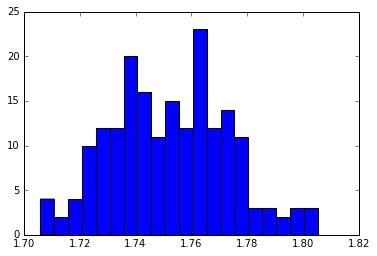

In [7]:
hist(dists, bins=20)

Bond angles
-----------

We can use the angle function to calculate the X-Y-Z bond angle of three atoms, X, Y and Z. For example, the Al1-O1-S1 bond angle is

In [8]:
atoms.angle(atoms.Al1, atoms.O1, atoms.Si1)

2.1049612709736554

That's in radians. If we want it in degrees, we can either do the maths or specify the degrees option.

In [9]:
atoms.angle(atoms.Al1, atoms.O1, atoms.Si1, degrees=True)

120.60539686528409

We could do a similar thing as we did with bond lengths to look at the Al-O-X bond angle distribution, where X is any second nearest neighbour.

In [10]:
angles = []

# Loop over every aluminium atom
for atom_Al in atoms.species('Al'):
    
    # Find all oxygens within 2.0 A of the Al atom, i.e. ones bonded
    for atom_O in atoms.species('O').within(atom_Al, 2.0):
        
        # Find all Si and Al within 2.0 of the bonded oxygen
        for atom_X in atoms.species('Si', 'Al').within(atom_O, 2.0):
            
            # Check that we haven't found the original Al atom! Otherwise angle will equal zero
            if atom_Al != atom_X:
                angle = atoms.angle(atom_Al, atom_O, atom_X, degrees=True)
                
                # Append it to our list
                angles.append(angle)
        
print("Mean bond angle =", mean(angles), "+-", std(angles))

Mean bond angle = 119.244646177 +- 5.4306395789


Plotting this distribution as a histogram we can see that there are two populations of bond angles, corresponding to the T1 (four-coordinated) and T2 (three-coordinated) sites.

(array([  6.,  20.,  22.,  26.,  16.,  16.,   8.,  13.,  14.,   3.,   0.,
          0.,   0.,   6.,   4.,   4.,   3.,   1.,   4.,   2.]),
 array([ 112.17244747,  113.33907751,  114.50570755,  115.67233759,
         116.83896763,  118.00559767,  119.17222771,  120.33885775,
         121.5054878 ,  122.67211784,  123.83874788,  125.00537792,
         126.17200796,  127.338638  ,  128.50526804,  129.67189808,
         130.83852812,  132.00515816,  133.1717882 ,  134.33841824,
         135.50504828]),
 <a list of 20 Patch objects>)

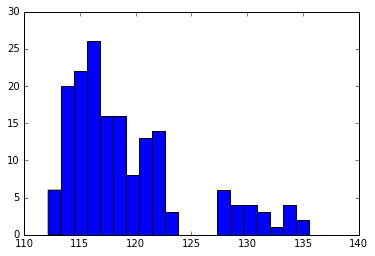

In [11]:
hist(angles, bins=20)